# Lab 2

## Pichus och Pikachus

In [ ]:
# Kokchun: Don't look at this one, saving it only as a backup

import matplotlib.pyplot as plt
import re
import math

# reading data, removing first line. Formatting data to nestled lists.
with open("Data/datapoints.txt") as data_read:
    data = data_read.readlines()
data = data[1:]

data_list = []
for line in data:
    data_split = []
    line_split = line.split()
    for element in line_split:
        data_split.append(element.strip(","))
    data_list.append(data_split)

# plotting points, redo for Pichu, blue for Pikachu
for line in data_list:
    if int(line[2]) == 0:
        color = "ro"
    else:
        color = "bo"
    plt.plot(float(line[0]), float(line[1]), color)

# adding testpoints
with open("Data/testpoints.txt") as test_read:
    testpoints = test_read.readlines()
testpoints = testpoints[1:]
test_list = []

# putting testpoints in nestled lists as floats. removing commas.
for line in testpoints:
    x = re.search(r"\(", line)
    y = re.search(r"\)", line)
    x_1 = x.span()[0]
    y_1 = y.span()[0]
    point = line[x_1+1:y_1].split()
    point_floats = []
    for coordinate in point:
        coordinate = coordinate.strip(",")
        point_floats.append(float(coordinate))
    test_list.append(point_floats)

# calculating distance from testpoints to all points. finding the closest point. checking if that point is a Pichu or Pikachu.
for point in test_list:
    dist_list =[]
    x_1 = point[0]
    y_1 = point[1]
    for point2 in data_list:
        x_2 = float(point2[0])
        y_2 = float(point2[1])
        dist = math.sqrt((x_2-x_1)**2+(y_2-y_1)**2)
        dist_list.append(dist)
    minimum = min(dist_list)
    index = dist_list.index(minimum)
    if data_list[index][2] == "0":
        print(f"{x_1}, {y_1} är en Pichu")
    else:
        print(f"{x_1}, {y_1} är en Pikachu")
    plt.plot(x_1, y_1, "yo")

In [ ]:
# Uppgift 1

import matplotlib.pyplot as plt
import re
import math

# reading data, removing first line. Formatting data to nestled lists.
with open("Data/datapoints.txt") as data_read:
    data = data_read.readlines()
data = data[1:]

data_list = []
for line in data:
    data_split = []
    line_split = line.split()
    for element in line_split:
        data_split.append(element.strip(","))
    data_list.append(data_split)

# plotting points, red for Pichu, blue for Pikachu
for line in data_list:
    if int(line[2]) == 0:
        color = "ro"
    else:
        color = "bo"
    plt.plot(float(line[0]), float(line[1]), color)


# user input for a point
while True:
    x_1 = input("Enter width")
    try:
        x_1 = float(x_1)
        if not 0 < x_1 < 100:
            raise ValueError("Width must be a float between 0 and 100.")
    except ValueError as err:
        print(err)
        continue
    y_1 = input("Enter height")
    try:
        y_1 = float(y_1)
        if not 0 < y_1 < 100:
            raise ValueError("Height must be a float between 0 and 100.")
    except ValueError as err:
        print(err)
        continue
    break
plt.plot(x_1, y_1, "yo")

# calculating distance from testpoints to all points. finding the closest point. checking if that point is a Pichu or Pikachu.
dist_list = []
for point2 in data_list:
    x_2 = float(point2[0])
    y_2 = float(point2[1])
    dist = math.sqrt((x_2-x_1)**2+(y_2-y_1)**2)
    dist_list.append(dist)
minimum = min(dist_list)
index = dist_list.index(minimum)
if data_list[index][2] == "0":
    print(f"{x_1}, {y_1} är en Pichu")
else:
    print(f"{x_1}, {y_1} är en Pikachu")
plt.plot([x_1, float(data_list[index][0])],[y_1, float(data_list[index][1])]); # drawing a line to the closest datapoint





In [ ]:
# Uppgift 2

import matplotlib.pyplot as plt
import re
import math

# reading data, removing first line. Formatting data to nestled lists.
with open("Data/datapoints.txt") as data_read:
    data = data_read.readlines()
data = data[1:]

data_list = []
for line in data:
    data_split = []
    line_split = line.split()
    for element in line_split:
        data_split.append(element.strip(","))
    data_list.append(data_split)

# plotting points, red for Pichu, blue for Pikachu
for line in data_list:
    if int(line[2]) == 0:
        color = "ro"
    else:
        color = "bo"
    plt.plot(float(line[0]), float(line[1]), color)

# user input for a point
while True:
    x_1 = input("Enter width")
    try:
        x_1 = float(x_1)
        if not 0 < x_1 < 100:
            raise ValueError("Width must be a float between 0 and 100.")
    except ValueError as err:
        print(err)
        continue
    y_1 = input("Enter height")
    try:
        y_1 = float(y_1)
        if not 0 < y_1 < 100:
            raise ValueError("Height must be a float between 0 and 100.")
    except ValueError as err:
        print(err)
        continue
    break
plt.plot(x_1, y_1, "yo")

# calculating distance from testpoints to all points. finding the closest 10 points. checking if most of those are Pikachu or Pichu
dist_list = []
pokesum = 0
for point2 in data_list:
    x_2 = float(point2[0])
    y_2 = float(point2[1])
    dist = math.sqrt((x_2-x_1)**2+(y_2-y_1)**2)
    dist_list.append(dist)

for i in range(10):
    minimum = min(dist_list)
    index = dist_list.index(minimum)
    pokesum += float(data_list[index][2])
    plt.plot([x_1, float(data_list[index][0])],[y_1, float(data_list[index][1])])
    dist_list.remove(min(dist_list))
    data_list.remove(data_list[index])
if pokesum > 5:
    print(f"({x_1}, {y_1}) is probably a Pikachu")
elif pokesum < 5:
    print(f"({x_1}, {y_1}) is probably a Pichu")
else:
    print(f"It is unclear what Pokemon ({x_1}, {y_1}) is")


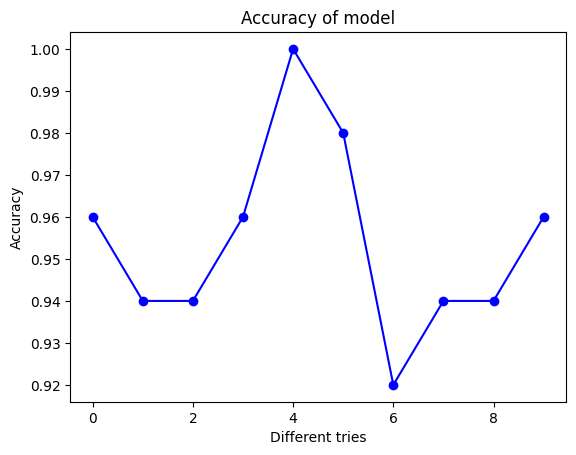

In [49]:
# Bonusuppgift 3
import random
import math

accuracy = []
data_list = []
for line in data:
    data_split = []
    line_split = line.split()
    for element in line_split:
        data_split.append(element.strip(","))
    data_list.append(data_split)
for j in range(10):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
        
    pikachus = []
    pichus = []
    for i in range(150):
        if data_list[i][2] == "1":
            pikachus.append(data_list[i])
    for i in range(150):
        if data_list[i][2] == "0":
            pichus.append(data_list[i])

    pikachus_data_points = [i for i in range(75)]
    pikachus_test_points = random.sample(pikachus_data_points, k=25)
    pikachus_test_points.sort()
    for point in pikachus_test_points:
        pikachus_data_points.remove(point)


    with open("Data/pikachus_data_points.txt", "w") as f_data, open("Data/pikachus_test_points.txt", "w") as f_test:
        f_data.write(str(pikachus_data_points))
        f_test.write(str(pikachus_test_points))

    pichus_data_points = [i for i in range(75)]
    pichus_test_points = random.sample(pichus_data_points, k=25)
    pichus_test_points.sort()
    for point in pichus_test_points:
        pichus_data_points.remove(point)


    with open("Data/pichus_data_points.txt", "w") as f_data, open("Data/pichus_test_points.txt", "w") as f_test:
        f_data.write(str(pichus_data_points))
        f_test.write(str(pichus_test_points))


    """ # plotting 50 Pikachus
    for i, line in enumerate(pikachus):
        if i in pikachus_data_points:
            plt.plot(float(line[0]), float(line[1]), "bo")
    # plotting 50 Pichus
    for i, line in enumerate(pichus):
        if i in pichus_data_points:
            plt.plot(float(line[0]), float(line[1]), "ro") """

    random_data_points = []
    for i, line in enumerate(pikachus):
        if i in pikachus_data_points:
            random_data_points.append(line)
    for i, line in enumerate(pichus):
        if i in pichus_data_points:
            random_data_points.append(line)




    for i in pikachus_test_points:
        dist_list = []
        pokesum = 0
        random_data_points_temp = list(random_data_points)
        x_1 = float(pikachus[i][0])
        y_1 = float(pikachus[i][1])
        for point in random_data_points:
            x_2 = float(point[0])
            y_2 = float(point[1])
            dist = math.sqrt((x_2-x_1)**2+(y_2-y_1)**2)
            dist_list.append(dist)
        for i in range(10):
            minimum = min(dist_list)
            index = dist_list.index(minimum)
            pokesum += float(random_data_points_temp[index][2])
            dist_list.remove(min(dist_list))
            random_data_points_temp.remove(random_data_points_temp[index])
            
        if pokesum > 5:
            TP += 1
        else:
            FN += 1

    for i in pichus_test_points:
        dist_list = []
        pokesum = 0
        random_data_points_temp = list(random_data_points)
        x_1 = float(pichus[i][0])
        y_1 = float(pichus[i][1])
        for point in random_data_points:
            x_2 = float(point[0])
            y_2 = float(point[1])
            dist = math.sqrt((x_2-x_1)**2+(y_2-y_1)**2)
            dist_list.append(dist)
        for i in range(10):
            minimum = min(dist_list)
            index = dist_list.index(minimum)
            pokesum += float(random_data_points_temp[index][2])
            dist_list.remove(min(dist_list))
            random_data_points_temp.remove(random_data_points_temp[index])
            
        if pokesum > 5:
            FP += 1
        else:
            TN += 1
    x = (TP + TN)/50
    accuracy.append(x)
plt.plot(accuracy, "bo-")
plt.title("Accuracy of model") 
plt.xlabel("Different tries")
plt.ylabel("Accuracy");




In [14]:
my_list1 = [1, 2, 3]
my_list2 = my_list1
my_list1 += [4]
print(my_list1) # [1, 2, 3, 4]
print(my_list2 )# [1, 2, 3, 4]




[1, 2, 3, 4]
[1, 2, 3, 4]


In [15]:
my_list1 = [1, 2, 3]
my_list2 = list(my_list1)
my_list1 += [4]
print(my_list1) # [1, 2, 3, 4]
print(my_list2) # [1, 2, 3]

[1, 2, 3, 4]
[1, 2, 3]
